In [1]:
# Importando o dataset iris
from sklearn.datasets import load_iris
X,y = load_iris(return_X_y=True,as_frame=True)

In [2]:
# Selecionando apenas as colunas de pétala
X = X.loc[:,['petal length (cm)','petal width (cm)']]

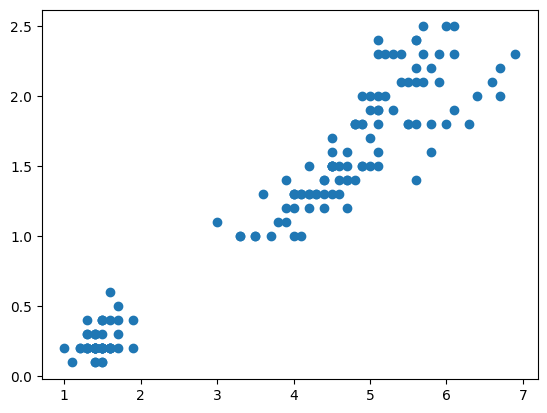

In [3]:
# Visualizando graficamente os pontos
import matplotlib.pyplot as plt

fig, ax = plt.subplots()

ax.scatter(X['petal length (cm)'], X['petal width (cm)'])

plt.show()

In [4]:
# Importando o KMeans
from sklearn.cluster import KMeans

In [5]:
# Utilizando o algoritmo
kmeans2 = KMeans(n_clusters=2, random_state=0).fit(X)

In [6]:
# Verificando quais foram os labels determinados pelo k-means
kmeans2.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

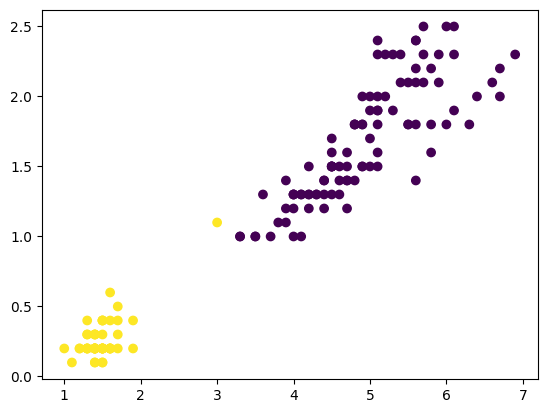

In [7]:
# Visualizando graficamente
fig, ax = plt.subplots()

ax.scatter(X['petal length (cm)'], X['petal width (cm)'],c=kmeans2.labels_)

plt.show()

In [8]:
# Utilizando k = 3
kmeans3 = KMeans(n_clusters=3, random_state=0).fit(X)

In [9]:
# Verificando quais foram os labels determinados pelo k-means
kmeans3.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

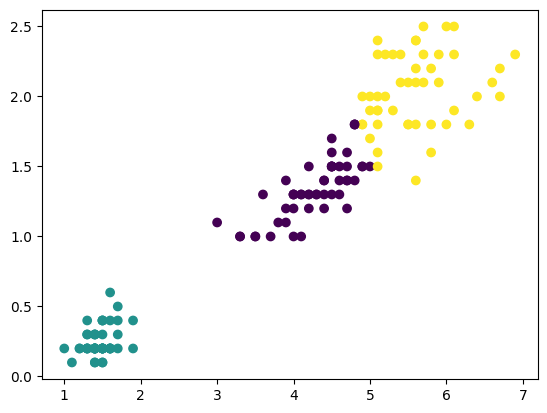

In [10]:
# Visualizando graficamente
fig, ax = plt.subplots()

ax.scatter(X['petal length (cm)'], X['petal width (cm)'],c=kmeans3.labels_)

plt.show()

In [11]:
# Utilizando k = 4
kmeans4 = KMeans(n_clusters=4, random_state=0).fit(X)

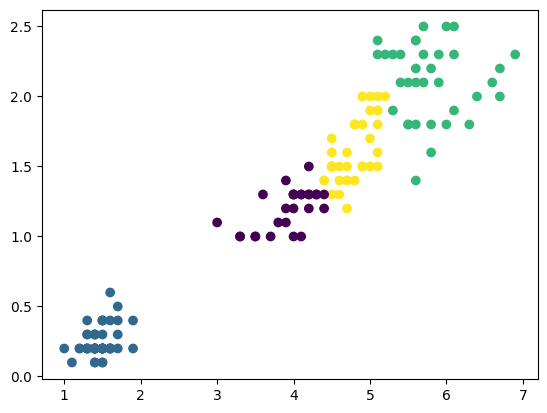

In [12]:
# Visualizando graficamente
fig, ax = plt.subplots()

ax.scatter(X['petal length (cm)'], X['petal width (cm)'],c=kmeans4.labels_)

plt.show()

In [13]:
# Utilizando k = 5
kmeans5 = KMeans(n_clusters=5,random_state=0).fit(X)

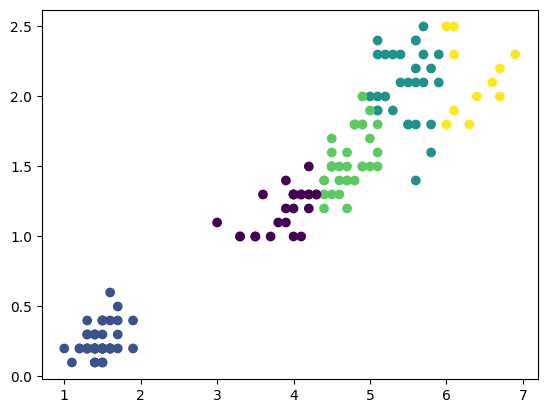

In [14]:
# Visualizando graficamente
fig, ax = plt.subplots()

ax.scatter(X['petal length (cm)'], X['petal width (cm)'],c=kmeans5.labels_)

plt.show()

In [15]:
# Percorrendo diferentes valores de K
valores_k = []
inercias = []

for i in range(1,15):
    kmeans = KMeans(n_clusters=i,random_state=0).fit(X)
    valores_k.append(i)
    inercias.append(kmeans.inertia_)

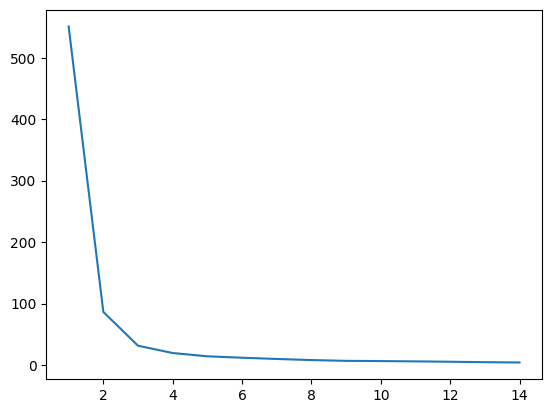

In [16]:
# Visualizando a relação entre inércia e K
fig, ax = plt.subplots()

ax.plot(valores_k,inercias)

plt.show()

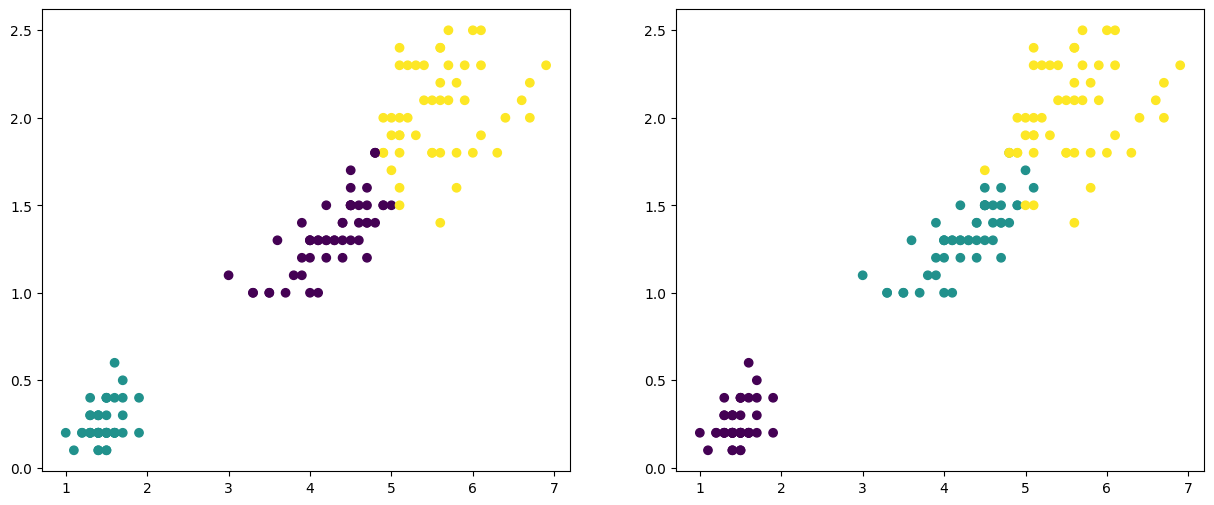

In [17]:
# Podemos visualizar o target e os labels em um mesmo gráfico
fig, ax = plt.subplots(ncols=2,figsize=(15,6))

ax[0].scatter(X['petal length (cm)'], X['petal width (cm)'],c=kmeans3.labels_)
ax[1].scatter(X['petal length (cm)'], X['petal width (cm)'],c=y)

plt.show()

In [18]:
# Verificando o adjusted_rand_score para k = 2
from sklearn import metrics
metrics.adjusted_rand_score(y,kmeans2.labels_)

0.5583714437541352

In [19]:
# Para k = 3
metrics.adjusted_rand_score(y,kmeans3.labels_)

0.8856970310281228

In [20]:
# k = 4
metrics.adjusted_rand_score(y,kmeans4.labels_)

0.6799548800041489

In [21]:
# Podemos percorrer os valores de k calculando esses dois indicadores
valores_k = []
ARI = []
RI = []

for i in range(1,15):
    kmeans = KMeans(n_clusters=i,random_state=0).fit(X)
    valores_k.append(i)
    RI.append(metrics.rand_score(y,kmeans.labels_))
    ARI.append(metrics.adjusted_rand_score(y,kmeans.labels_))

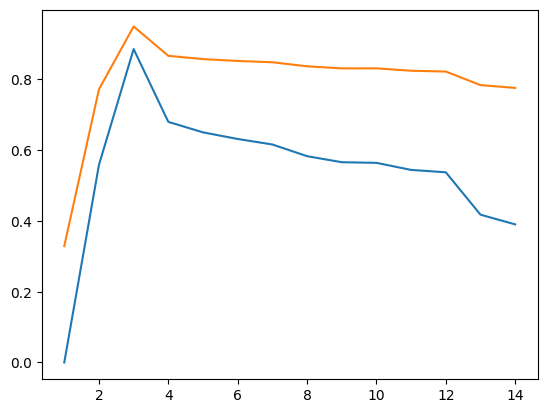

In [22]:
# E visualizar graficamente como ele se comporta para cada valor de k
fig, ax = plt.subplots()

ax.plot(valores_k,ARI)
ax.plot(valores_k,RI)

plt.show()

In [23]:
# Verificando o silhouette_score para k = 2
metrics.silhouette_score(X,kmeans2.labels_)

0.7653904101258123

In [24]:
# E para k = 3
metrics.silhouette_score(X,kmeans3.labels_)

0.6604800083974887

In [25]:
# Percorrendo para diferentes valores de k
valores_k = []
s = []

for i in range(2,15):
    kmeans = KMeans(n_clusters=i,random_state=0).fit(X)
    valores_k.append(i)
    s.append(metrics.silhouette_score(X,kmeans.labels_))

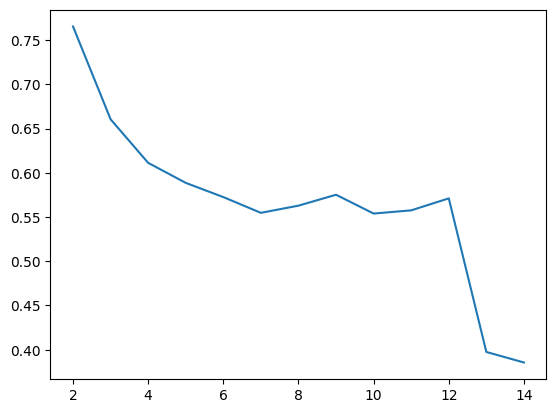

In [26]:
# E visualizando graficamente
fig, ax = plt.subplots()

ax.plot(valores_k,s)

plt.show()